<a href="https://colab.research.google.com/github/mohiuddinshahrukh/ML_LAB_4/blob/main/Lab05_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

In this lab you will learn the most important aspects of the random forest learning method.
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [1]:
!git clone https://github.com/mohiuddinshahrukh/ML_LAB_4.git


Cloning into 'ML_LAB_4'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 0), reused 13 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 731.07 KiB | 8.92 MiB/s, done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [4]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="https://github.com/mohiuddinshahrukh/ML_LAB_4/blob/main/figures/dataset.png?raw=1" width="600"/>

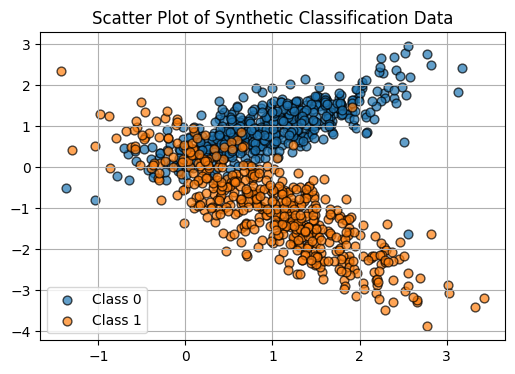

In [9]:
### WRITE YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
# Plot class 0
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0',
            alpha=0.7, edgecolor='k', s=40)

# Plot class 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1',
            alpha=0.7, edgecolor='k', s=40)

plt.title("Scatter Plot of Synthetic Classification Data")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [12]:
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
### WRITE YOUR CODE HERE ###
clf.fit(X_train, y_train)

# Predict on both training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 0.9212


## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1.
(This can only be done once we have trained the random forest classifier)

In [13]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the 'contourf' function of matplotlib.

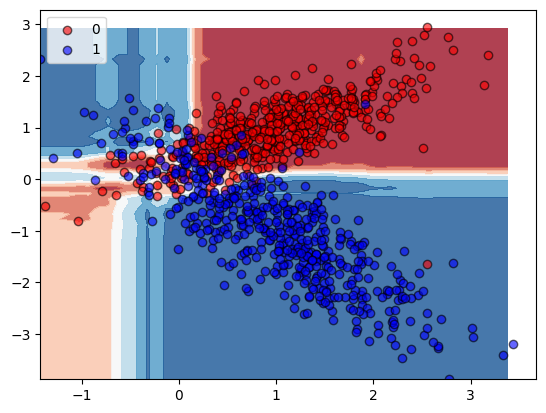

In [14]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="https://github.com/mohiuddinshahrukh/ML_LAB_4/blob/main/figures/num_trees.png?raw=1" width="600"/>

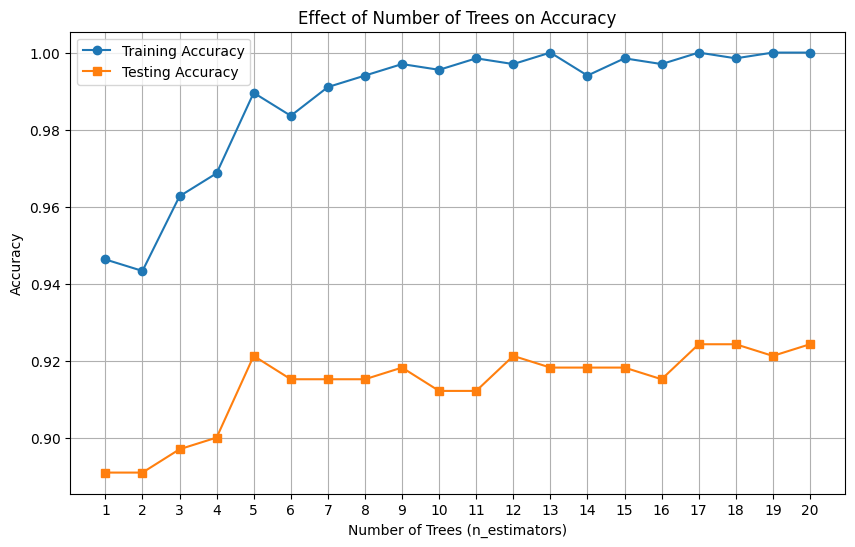

In [15]:
### WRITE YOUR CODE HERE ###
train_accuracies = []
test_accuracies = []
n_estimators_range = range(1, 21)

# Loop over number of trees
for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Trees on Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(n_estimators_range)
plt.show()

<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy.
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

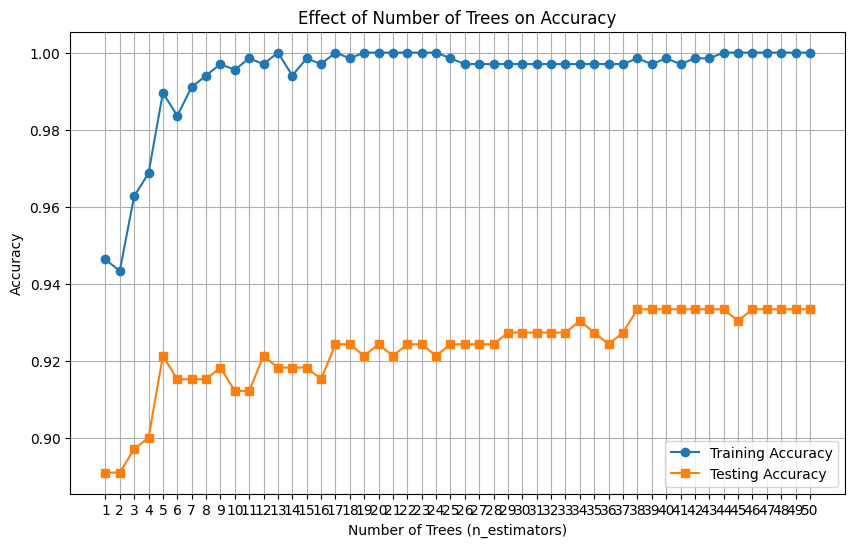

In [16]:
### WRITE YOUR CODE HERE ###
train_accuracies = []
test_accuracies = []
n_estimators_range = range(1, 51)

# Loop over number of trees
for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Trees on Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(n_estimators_range)
plt.show()

<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy.
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths.
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50).
This plot should look like this:
<img src="https://github.com/mohiuddinshahrukh/ML_LAB_4/blob/main/figures/max_depth.png?raw=1" width="600"/>

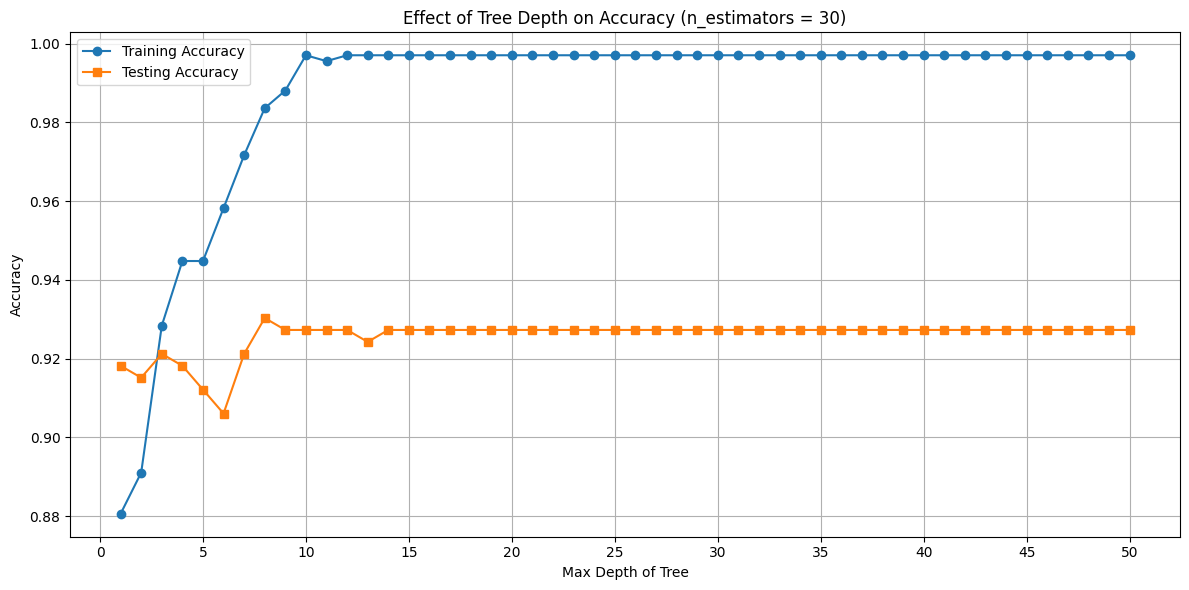

In [17]:
### WRITE YOUR CODE HERE ###
train_accuracies = []
test_accuracies = []
depth_range = range(1, 51)

# Train model with fixed n_estimators=30 and varying max_depth
for depth in depth_range:
    clf = RandomForestClassifier(n_estimators=30, max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_range, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Effect of Tree Depth on Accuracy (n_estimators = 30)')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 51, 5))
plt.tight_layout()
plt.show()

## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [28]:
churn_df = pd.read_csv('/content/ML_LAB_4/telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them.

In [30]:
### WRITE YOUR CODE HERE ###
churn_df_encoded = pd.get_dummies(churn_df, columns=['State', 'Area code', 'International plan', 'Voice mail plan'], drop_first=True)
churn_df_encoded = churn_df_encoded.astype(int)
churn_df_encoded.dtypes
churn_df_encoded.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,128,25,265,110,45,197,99,16,244,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161,123,27,195,103,16,254,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243,114,41,121,110,10,162,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299,71,50,61,88,5,196,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166,113,28,148,122,12,186,121,...,0,0,0,0,0,0,1,0,1,0


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="https://github.com/mohiuddinshahrukh/ML_LAB_4/blob/main/figures/importance.png?raw=1" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

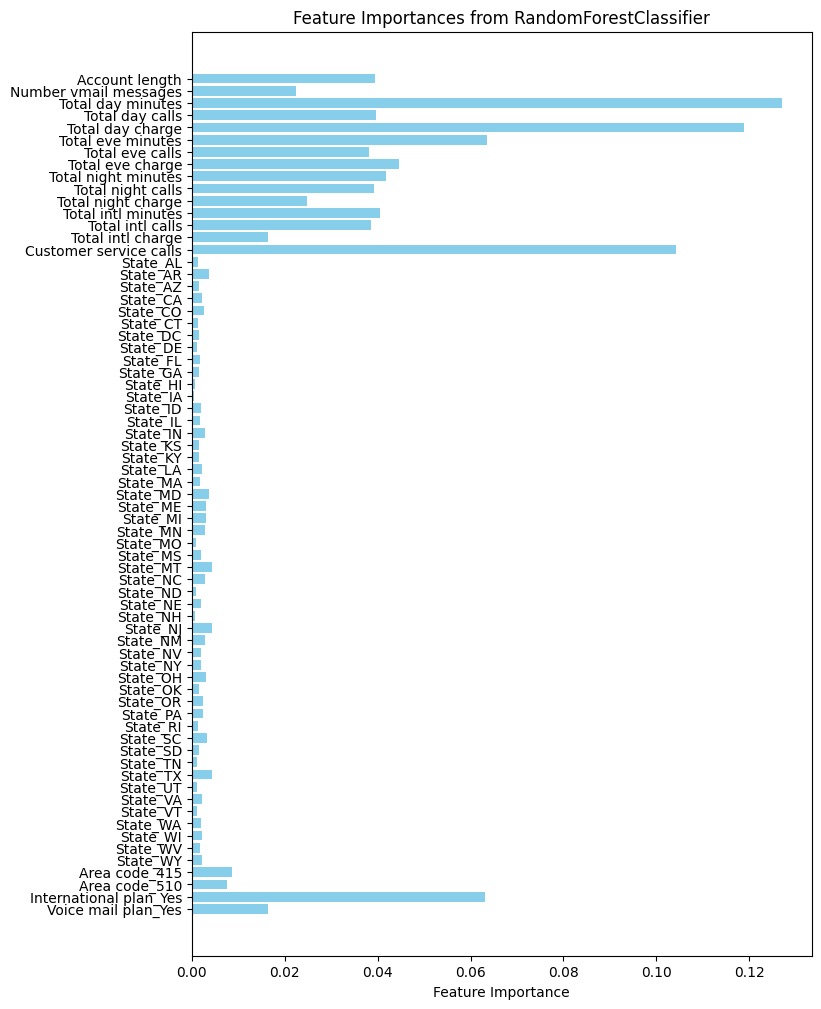

In [34]:
### WRITE YOUR CODE HERE ###
X = churn_df_encoded
y = label

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Create a bar plot of the feature importances
features = X.columns
plt.figure(figsize=(8, 12))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [22]:
from sklearn.metrics import mean_squared_error
### WRITE YOUR CODE HERE ###
# 1. Generate regression dataset with 10 features
X, y = make_regression(n_samples=1000, n_features=10, noise=10.0, random_state=42)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Train RandomForestRegressor (default parameters)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# 4. Predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# 5. Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")

Training MSE: 415.09
Testing MSE: 2774.17


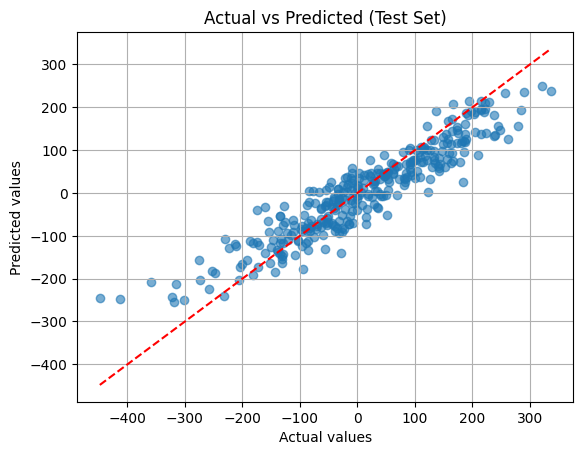

In [24]:
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted (Test Set)")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.show()
